In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',20)

###DESCRIBING THE DATASET

|Feature Name||Description|
|------------||-----------|
|Fault||Whose fault is it|
|Rep no||Licensing test|
|Rank ||Policy type|
|Collision||Headon covered for self vehicle |
|Liability||Headon covered for other vehicle|
|All perils||Cover everything even scratch|
|Deductible||Insurance amount paid by policy holder|
|Days_Policy_Accident||After how many days accident took place|
|Days_Policy_Claim||After how many days claim was made|
|NumberOfSuppliments||Change in policy| 

# IMPORT THE DATASET

In [55]:
df=pd.read_csv('fraud_oracle.csv')

In [56]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# EXPLORATORY DATA ANALYSIS

In [57]:
df.shape

(15420, 33)

In [58]:

df.nunique()



Month                  12
WeekOfMonth             5
DayOfWeek               7
Make                   19
AccidentArea            2
                       ..
NumberOfSuppliments     4
AddressChange_Claim     5
NumberOfCars            5
Year                    3
BasePolicy              3
Length: 33, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [60]:
df.isnull().sum()

Month                  0
WeekOfMonth            0
DayOfWeek              0
Make                   0
AccidentArea           0
                      ..
NumberOfSuppliments    0
AddressChange_Claim    0
NumberOfCars           0
Year                   0
BasePolicy             0
Length: 33, dtype: int64

In [61]:
valuec=['NumberOfCars','AgeOfVehicle','Age','VehiclePrice','PastNumberOfClaims','AgeOfPolicyHolder','Days_Policy_Accident']
for val in valuec:
    print("COUNT OF UNIQUE VALUES IN ",val)
    print(df[val].value_counts(ascending=True))
    print('\n')
    

COUNT OF UNIQUE VALUES IN  NumberOfCars
more than 8        2
5 to 8            21
3 to 4           372
2 vehicles       709
1 vehicle      14316
Name: NumberOfCars, dtype: int64


COUNT OF UNIQUE VALUES IN  AgeOfVehicle
2 years          73
3 years         152
4 years         229
new             373
5 years        1357
6 years        3448
more than 7    3981
7 years        5807
Name: AgeOfVehicle, dtype: int64


COUNT OF UNIQUE VALUES IN  Age
17      6
16      9
79     20
70     27
20     28
     ... 
28    560
35    569
34    573
33    574
30    596
Name: Age, Length: 66, dtype: int64


COUNT OF UNIQUE VALUES IN  VehiclePrice
60000 to 69000       87
40000 to 59000      461
less than 20000    1096
more than 69000    2164
30000 to 39000     3533
20000 to 29000     8079
Name: VehiclePrice, dtype: int64


COUNT OF UNIQUE VALUES IN  PastNumberOfClaims
more than 4    2010
1              3573
none           4352
2 to 4         5485
Name: PastNumberOfClaims, dtype: int64


COUNT OF UNIQUE VALU

In [62]:
df.columns


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

<AxesSubplot:>

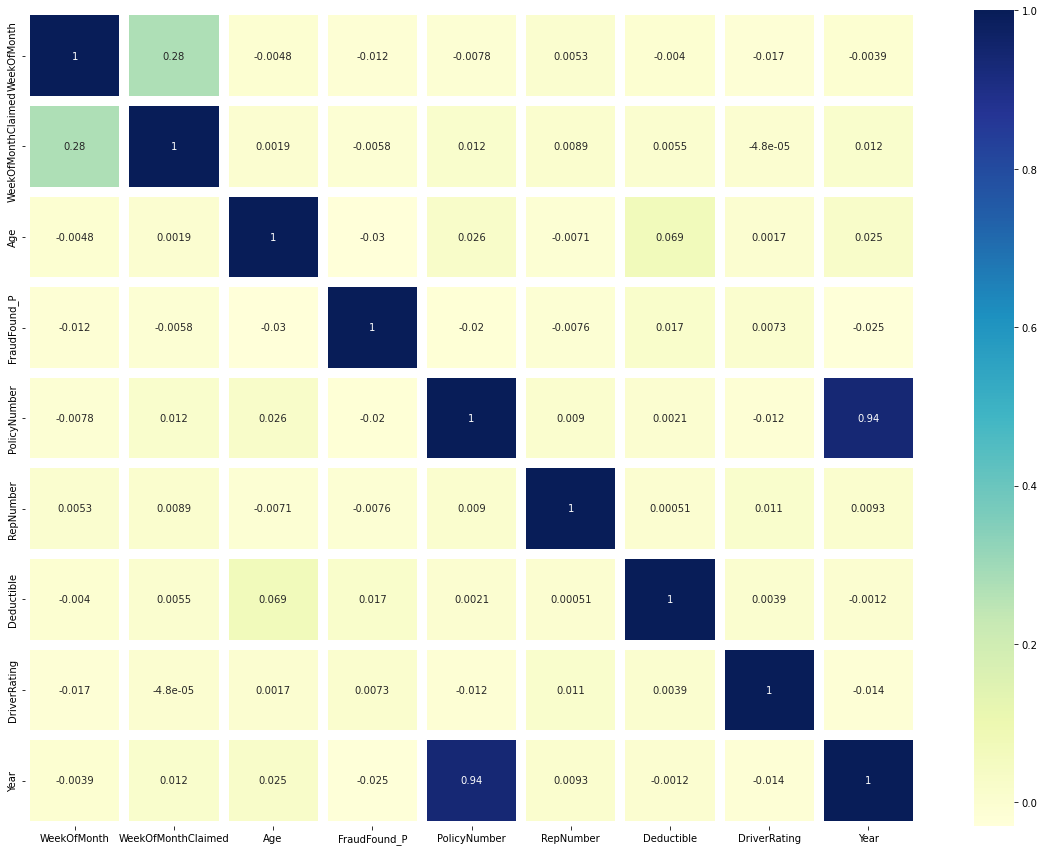

In [63]:
df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,linewidths=10)

# DATA PREPROCESSING

In [64]:
columns_to_remove=['WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','PolicyType','PolicyNumber','Year']

In [65]:
df=df.drop(columns_to_remove,axis=1)

In [66]:
df.shape

(15420, 26)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   Make                  15420 non-null  object
 2   AccidentArea          15420 non-null  object
 3   MonthClaimed          15420 non-null  object
 4   Sex                   15420 non-null  object
 5   MaritalStatus         15420 non-null  object
 6   Age                   15420 non-null  int64 
 7   Fault                 15420 non-null  object
 8   VehicleCategory       15420 non-null  object
 9   VehiclePrice          15420 non-null  object
 10  FraudFound_P          15420 non-null  int64 
 11  RepNumber             15420 non-null  int64 
 12  Deductible            15420 non-null  int64 
 13  DriverRating          15420 non-null  int64 
 14  Days_Policy_Accident  15420 non-null  object
 15  Days_Policy_Claim     15420 non-null

In [68]:
df.head()

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport,more than 69000,0,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport,more than 69000,0,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Toyota,Rural,Jul,Male,Married,65,Third Party,Sport,20000 to 29000,0,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Honda,Urban,Feb,Female,Single,27,Third Party,Sport,more than 69000,0,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


In [69]:
y=df['FraudFound_P']
X=df.drop('FraudFound_P',axis=1)

In [70]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [71]:
X

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport,more than 69000,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport,more than 69000,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport,more than 69000,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Toyota,Rural,Jul,Male,Married,65,Third Party,Sport,20000 to 29000,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Honda,Urban,Feb,Female,Single,27,Third Party,Sport,more than 69000,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Toyota,Urban,Nov,Male,Married,35,Policy Holder,Sedan,20000 to 29000,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Pontiac,Urban,Dec,Male,Married,30,Policy Holder,Sport,30000 to 39000,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Toyota,Rural,Dec,Male,Single,24,Policy Holder,Sedan,20000 to 29000,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Toyota,Urban,Dec,Female,Married,34,Third Party,Sedan,20000 to 29000,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [72]:
col_for_one_encoding=['Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType','AccidentArea','PastNumberOfClaims']
col_for_label_encoding=['Month','Make','MonthClaimed','VehicleCategory','BasePolicy','MaritalStatus','NumberOfSuppliments','AddressChange_Claim','Days_Policy_Claim','Days_Policy_Accident','Age','VehiclePrice','AgeOfVehicle','AgeOfPolicyHolder','NumberOfCars']

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [74]:
data=X.copy()

In [75]:
data

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport,more than 69000,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport,more than 69000,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport,more than 69000,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Toyota,Rural,Jul,Male,Married,65,Third Party,Sport,20000 to 29000,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Honda,Urban,Feb,Female,Single,27,Third Party,Sport,more than 69000,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Toyota,Urban,Nov,Male,Married,35,Policy Holder,Sedan,20000 to 29000,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Pontiac,Urban,Dec,Male,Married,30,Policy Holder,Sport,30000 to 39000,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Toyota,Rural,Dec,Male,Single,24,Policy Holder,Sedan,20000 to 29000,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Toyota,Urban,Dec,Female,Married,34,Third Party,Sedan,20000 to 29000,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [76]:
one_encoder=OneHotEncoder(sparse=False,drop='first')
val=one_encoder.fit_transform(data[col_for_one_encoding])

In [77]:
one_hot_new=pd.DataFrame(val,columns=['male','third_party','PoliceReportFiled','WitnessPresent','Internal','Urban','2 to 4','more than 4','none'])

In [78]:
one_hot_new

,male,third_party,PoliceReportFiled,WitnessPresent,Internal,Urban,2 to 4,more than 4,none
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
15415,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15416,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15418,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
lab_encoder=LabelEncoder()
for feature in col_for_label_encoding:
 val1=lab_encoder.fit_transform(X[feature])
 val2=pd.DataFrame(val1,columns=[feature+' new'])
 X=pd.concat([X,val2],axis=1)

In [80]:
X=X.drop(col_for_one_encoding,axis=1)

In [81]:
X=X.drop(col_for_label_encoding,axis=1)


In [82]:
X=pd.concat([X,one_hot_new],axis=1)

In [83]:
X

,RepNumber,Deductible,DriverRating,Month new,Make new,MonthClaimed new,VehicleCategory new,BasePolicy new,MaritalStatus new,NumberOfSuppliments new,AddressChange_Claim new,Days_Policy_Claim new,Days_Policy_Accident new,Age new,VehiclePrice new,AgeOfVehicle new,AgeOfPolicyHolder new,NumberOfCars new,male,third_party,PoliceReportFiled,WitnessPresent,Internal,Urban,2 to 4,more than 4,none
0,12,300,1,2,6,5,1,2,2,3,0,2,3,6,5,1,3,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,15,400,4,4,6,5,1,1,2,3,3,2,3,19,5,4,4,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,400,3,10,6,10,1,1,1,3,3,2,3,32,5,5,6,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,400,2,6,17,6,1,2,1,2,3,2,3,50,0,6,7,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,400,1,4,6,4,1,1,2,3,3,2,3,12,5,3,4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,5,400,4,9,17,10,0,1,1,3,3,2,3,20,0,4,4,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15416,11,400,3,9,13,3,1,2,1,2,3,2,3,15,1,4,4,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15417,4,400,4,9,17,3,0,1,2,0,3,2,3,9,0,3,3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15418,6,400,4,2,17,3,0,0,1,2,3,2,3,19,0,0,4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [84]:
cor1=pd.concat([X,y],axis=1)

<AxesSubplot:>

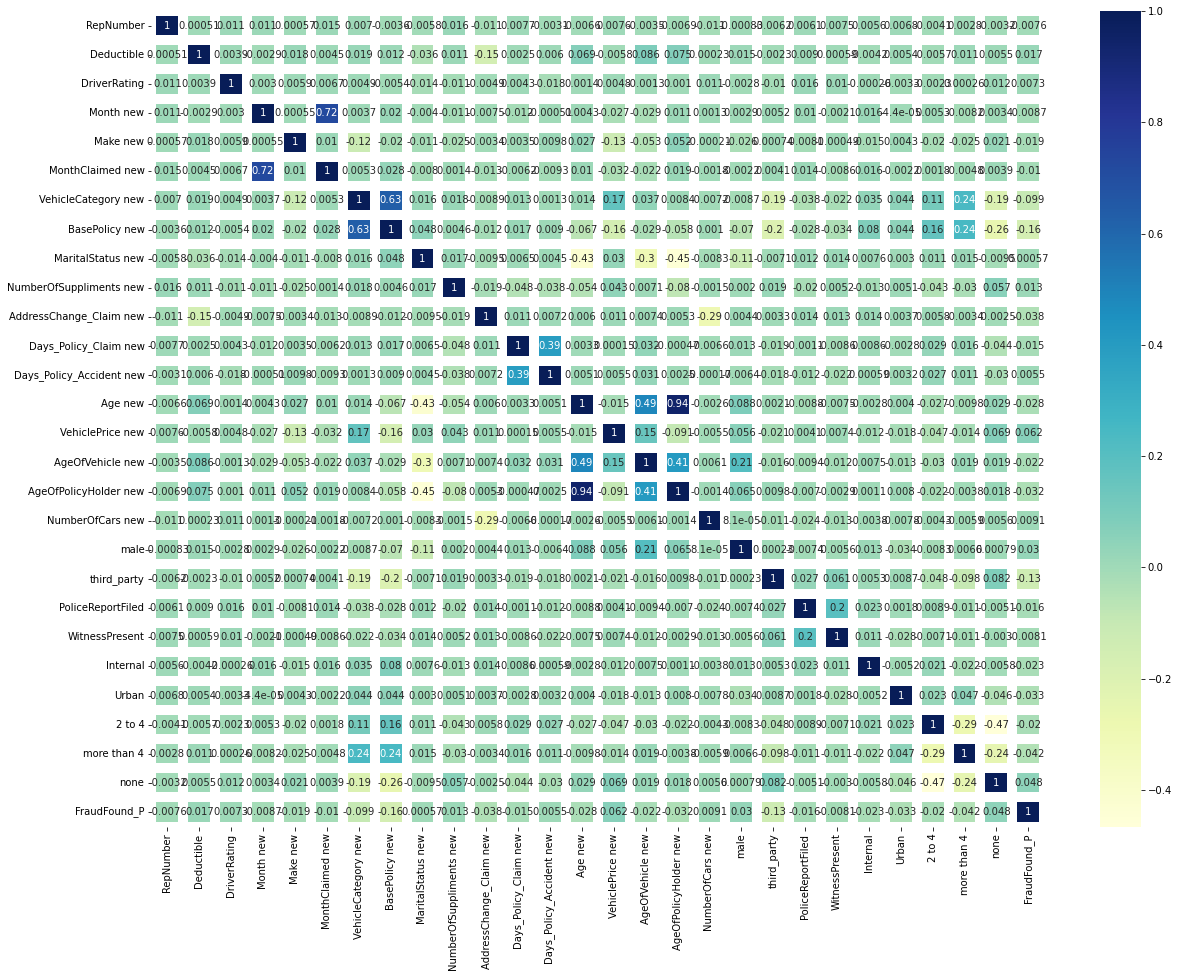

In [85]:
# Heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(cor1.corr(),cmap="YlGnBu",annot=True,linewidths=10)

In [86]:
rem=['AgeOfPolicyHolder new','Month new','Age new']

In [87]:
X=X.drop(rem,axis=1)

In [88]:
X.shape

(15420, 24)

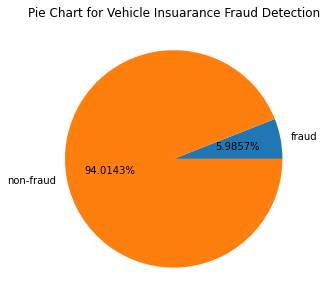

In [89]:
#Pie Chart
plt.subplots(figsize=(10,5))
zeroes=df.FraudFound_P[df.FraudFound_P==0].count()
ones=df.FraudFound_P[df.FraudFound_P==1].count()
data={'FraudFound_P':['fraud','non-fraud'],'values':[ones,zeroes]}
plt.pie(x='values',labels='FraudFound_P',data=data,autopct='%1.4f%%')
plt.title('Pie Chart for Vehicle Insuarance Fraud Detection')
plt.show()

In [90]:
import imblearn
from collections import Counter

In [91]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))



Original dataset shape Counter({0: 14497, 1: 923})
Resample dataset shape Counter({0: 14497, 1: 14497})


In [92]:
X=x_ros.copy()
y=y_ros

#SPLIT THE DATASET INTO TRAINING AND TESTING PART

In [93]:
from sklearn.model_selection import train_test_split 

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [95]:
X_train.shape

(20295, 24)

In [96]:
X_test.shape

(8699, 24)

In [97]:
y_train.shape

(20295,)

In [98]:
y_test.shape

(8699,)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)


array([[-0.08140338, -0.20281047, -0.45505729, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [-0.30091994, -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [-0.73995307,  1.97038831,  1.33578771, ...,  1.39929397,
        -0.34583319, -0.68743939],
       ...,
       [-1.39850275, -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [ 0.5771463 , -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319, -0.68743939],
       [-0.52043651, -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319,  1.45467369]])

In [100]:
scaler.transform(X_test)

array([[-0.73995307, -0.20281047,  1.33578771, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [-0.30091994, -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [ 0.13811318, -0.20281047, -0.45505729, ..., -0.71464612,
        -0.34583319,  1.45467369],
       ...,
       [ 1.01617943, -0.20281047, -0.45505729, ..., -0.71464612,
         2.89156746, -0.68743939],
       [ 1.01617943, -0.20281047,  0.44036521, ..., -0.71464612,
        -0.34583319,  1.45467369],
       [-0.52043651, -0.20281047,  0.44036521, ...,  1.39929397,
        -0.34583319, -0.68743939]])

# MODEL BUILDING

In [101]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score,confusion_matrix
                                                

In [102]:
c_old=[]
d_old=[]
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Training set Performance
    old_model_train_accuracy=accuracy_score(y_train,y_train_pred)
    old_model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    old_model_train_precision=precision_score(y_train,y_train_pred)
    old_model_train_recall=recall_score(y_train,y_train_pred)
    old_model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    
    
    #test set performance
      
        
    old_model_test_accuracy=accuracy_score(y_test,y_test_pred)
    old_model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    old_model_test_precision=precision_score(y_test,y_test_pred)
    old_model_test_recall=recall_score(y_test,y_test_pred)
    old_model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance For training Set")
    print("  Accuracy Score:{:.4f}".format(old_model_train_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_train_f1))
    print("  Precision:{:.4f}".format(old_model_train_precision))
    print("  Recall:{:.4f}".format(old_model_train_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_train_rocauc_score))
    
    print("------------------------------------------------------")
    
    print("Model Performance For test Set")
    print("  Accuracy Score:{:.4f}".format(old_model_test_accuracy))
    print("  F1 Score:{:.4f}".format(old_model_test_f1))
    print("  Precision:{:.4f}".format(old_model_test_precision))
    print("  Recall:{:.4f}".format(old_model_test_recall))
    print("  ROC Auc  Score:{:.4f}".format(old_model_test_rocauc_score))
    
    print("******************************************************")
    print('\n')
    c_old.append(old_model_train_accuracy)
    d_old.append(old_model_test_accuracy)
models_used=["LogisticRegression","DecisionTreeClassifier","KNeighborsClassifier"]
data={'Models        ':models_used,'Training Accuracy':c_old,'Test Accuracy':d_old}
df=pd.DataFrame(data)
print("SUMMARY OF ABOVE ",)
print(df)
    
    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance For training Set
  Accuracy Score:0.7368
  F1 Score:0.7349
  Precision:0.7017
  Recall:0.8219
  ROC Auc  Score:0.7370
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7431
  F1 Score:0.7412
  Precision:0.7098
  Recall:0.8266
  ROC Auc  Score:0.7427
******************************************************


Decision Tree
Model Performance For training Set
  Accuracy Score:0.9999
  F1 Score:0.9999
  Precision:0.9998
  Recall:1.0000
  ROC Auc  Score:0.9999
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.9691
  F1 Score:0.9690
  Precision:0.9420
  Recall:1.0000
  ROC Auc  Score:0.9689
******************************************************


KNN
Model Performance For training Set
  Accuracy Score:0.9130
  F1 Score:0.9124
  Precision:0.8516
  Recall:1.0000
  ROC Auc  Score:0.9132
------------------------------------------------------
Model Perfo

# HYPER PARAMETER TUNING

In [109]:
#GENERATING PARAMETERS FOR HYPER PARAMETER TRAINING

dt_params={"max_depth":[5,8,13,None,10],
           "max_features":[5,7,"auto",9],
           "random_state":[10,35,67,None],
           "max_leaf_nodes":[6,8,9,None]}
lg_params={"C":[0.01,0.1,1,10],
           "random_state":[10,35,67,None],
           "max_iter":[100,200,400,800]}
knn_params={"n_neighbors":[5,10,8,7,15,25],
            "p":[1,2],
            "n_jobs":[-1,None]}

In [110]:
randomcv_models=[
                ("Decision Tree",DecisionTreeClassifier(),dt_params),
                ("logistic",LogisticRegression(),lg_params),
                ("knn",KNeighborsClassifier(),knn_params)]

In [111]:
randomcv_models

[('Decision Tree',
  DecisionTreeClassifier(),
  {'max_depth': [5, 8, 13, None, 10],
   'max_features': [5, 7, 'auto', 9],
   'random_state': [10, 35, 67, None],
   'max_leaf_nodes': [6, 8, 9, None]}),
 ('logistic',
  LogisticRegression(),
  {'C': [0.01, 0.1, 1, 10],
   'random_state': [10, 35, 67, None],
   'max_iter': [100, 200, 400, 800]}),
 ('knn',
  KNeighborsClassifier(),
  {'n_neighbors': [5, 10, 8, 7, 15, 25], 'p': [1, 2], 'n_jobs': [-1, None]})]

In [112]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"------------------best parameters for {model_name}----------".format(model_name))
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 64 candidates, totalling 192 fits


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits
------------------best parameters for Decision Tree----------
{'random_state': 67, 'max_leaf_nodes': None, 'max_features': 9, 'max_depth': None}
------------------best parameters for logistic----------
{'random_state': 10, 'max_iter': 800, 'C': 1}
------------------best parameters for knn----------
{'p': 2, 'n_neighbors': 5, 'n_jobs': -1}


In [107]:
c_new=[]
d_new=[]
models={
    "Logistic Regression":LogisticRegression(random_state=10,max_iter=800,C=1),
    "Decision Tree":DecisionTreeClassifier(random_state=67,max_leaf_nodes=None,max_features=9,max_depth=None),
    "KNN":KNeighborsClassifier(n_neighbors=15,p=1,n_jobs=-1)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    # Making Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    
    #Training set Performance
    new_model_train_accuracy=accuracy_score(y_train,y_train_pred)
    new_model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    new_model_train_precision=precision_score(y_train,y_train_pred)
    new_model_train_recall=recall_score(y_train,y_train_pred)
    new_model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    
    
    #test set performance
      
        
    new_model_test_accuracy=accuracy_score(y_test,y_test_pred)
    new_model_test_f1=f1_score(y_test,y_test_pred,average="weighted")
    new_model_test_precision=precision_score(y_test,y_test_pred)
    new_model_test_recall=recall_score(y_test,y_test_pred)
    new_model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("Model Performance For training Set")
    print("  Accuracy Score:{:.4f}".format(new_model_train_accuracy))
    print("  F1 Score:{:.4f}".format(new_model_train_f1))
    print("  Precision:{:.4f}".format(new_model_train_precision))
    print("  Recall:{:.4f}".format(new_model_train_recall))
    print("  ROC Auc  Score:{:.4f}".format(new_model_train_rocauc_score))
    
    print("------------------------------------------------------")
    
    print("Model Performance For test Set")
    print("  Accuracy Score:{:.4f}".format(new_model_test_accuracy))
    print("  F1 Score:{:.4f}".format(new_model_test_f1))
    print("  Precision:{:.4f}".format(new_model_test_precision))
    print("  Recall:{:.4f}".format(new_model_test_recall))
    print("  ROC Auc  Score:{:.4f}".format(new_model_test_rocauc_score))
    
    print("******************************************************")
    print('\n')
    c_new.append(new_model_train_accuracy)
    d_new.append(new_model_test_accuracy)
models_used=["LogisticRegression","DecisionTreeClassifier","KNeighborsClassifier"]
data={'Models    ':models_used,'Train Accuracy':c_new,'Test Accuracy':d_new}
df=pd.DataFrame(data)
print("SUMMARY OF ABOVE ",)
print(df)





C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance For training Set
  Accuracy Score:0.7371
  F1 Score:0.7349
  Precision:0.6997
  Recall:0.8289
  ROC Auc  Score:0.7373
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.7459
  F1 Score:0.7438
  Precision:0.7101
  Recall:0.8355
  ROC Auc  Score:0.7455
******************************************************


Decision Tree
Model Performance For training Set
  Accuracy Score:0.9999
  F1 Score:0.9999
  Precision:0.9998
  Recall:1.0000
  ROC Auc  Score:0.9999
------------------------------------------------------
Model Performance For test Set
  Accuracy Score:0.9634
  F1 Score:0.9634
  Precision:0.9322
  Recall:1.0000
  ROC Auc  Score:0.9633
******************************************************


KNN
Model Performance For training Set
  Accuracy Score:0.8123
  F1 Score:0.8070
  Precision:0.7341
  Recall:0.9780
  ROC Auc  Score:0.8126
------------------------------------------------------
Model Perfo